**GRIP - Sparks Foundation**

**by Mayuri Chougale**

**Domain - Data Science & Business Analytics**

**Task#1 : Prediction using Supervised ML**

**Language used : Python** 

**Simple Linear Regression**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. 


Problem : What will be predicted score if a student studies for 9.25 hrs/ day?

In [59]:
#importing All Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [60]:
#Reading & Printing The DataSet
df=pd.read_csv('http://bit.ly/w-data')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


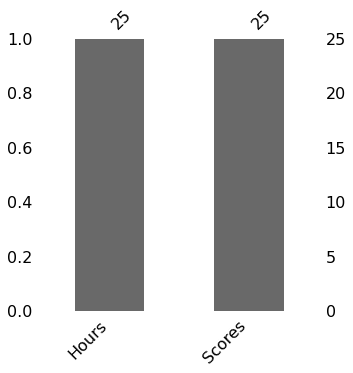

In [61]:
#Identify missing values
msn.bar(df,figsize=(5,5))

In [62]:
#Print The Information About DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [63]:
#Print The Summary Of DataSet
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


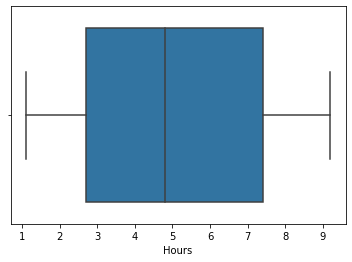

In [64]:
#Identify outliers
sns.boxplot(df['Hours'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


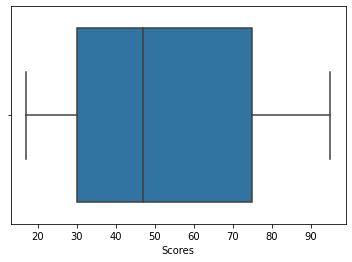

In [65]:
sns.boxplot(df['Scores'])

There is no outlier in the datset

**Let's plot our data points on 2-D graph to see if the data have any relationship. We can create the plot with the following script.**

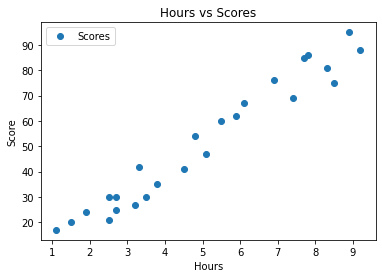

In [66]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.show()

**From the graph above, we can clearly see that there is positive linear relation between the number of hours studied and obtained score** 

**Preparing The Data**

In [67]:
#Divide the data
X=df.drop(columns=['Scores'])
y=df['Scores']

In [68]:
#Print the shape
print(X.shape , y.shape)

(25, 1) (25,)


**Splitting Data**

In [69]:
#Splitting Data Arrays Into Two Subsets: For Training Data And For Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2) 

**Applying Linear Regression**

In [70]:
#Algorithm 
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [71]:
#Compare Actual_Scores Vs Predicted_Scores
data_frame=pd.DataFrame(np.c_[X_test,y_test,pred],columns=['Study_Hours','Actual_Scores','Predicted_Scores'])
data_frame

,Study_Hours,Actual_Scores,Predicted_Scores
0,2.5,30.0,28.070447
1,3.8,35.0,40.450743
2,6.9,76.0,69.972986
3,3.2,27.0,34.736760
4,3.5,30.0,37.593751


Solving problem : Predicting the score 

In [72]:
# Test with own data
own_pred=lr.predict([[9.25]])
print("No of Hours = {}".format(9.25))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.35275110919855


**Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well our model perform on a particular dataset. We have chosen Mean_Squared_Error , Root_Mean_Squared_Error. There are many such metrics

In [73]:
#calculating error
print('Mean Squared Error (MSE) :',mse(y_test,pred))
print('Root Mean Squared Error (RMSE) :',np.sqrt(mse(y_test,pred)))
print('R-squared (R2) :',r2_score(y_test,pred))

Mean Squared Error (MSE) : 37.45623698507184
Root Mean Squared Error (RMSE) : 6.120150078639562
R-squared (R2) : 0.8891302480905996


**The R-Squared value is close to 1,thus making it a good model.**